# Using SciKit-Learn for classification and regression

In [1]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

In [2]:
iris = datasets.load_iris()

In [3]:
inputs = iris.data

#### 1.1 - Iris data - Checking volumes and shapes

In [4]:
inputs[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
outputs = iris.target

In [21]:
inputs.shape, iris.target.shape

((150, 4), (150,))

#### 1.2 - Train & Test - dataset splitting

It is entirely common practice to split an entire dataset into subsets for the purposes of training data and test data. The 
concept is that we test the model on data it has never seen before to determine a truer outcome than reprocessing data that was used to build the model with. 

We can define the split ratios but the idea is to create a good (_or best_) balance, where good is considered to be the most training data we can afford while keeping a reasonable test set. In reality this changes from project to project typically hovering in the 80/20 ratio for train/test and some in the 70/30 train/test regions.

**note:** It is also common practice to refer to `x` as the inputs and `y` as the expected results. 


In [22]:
from sklearn.model_selection import train_test_split

In [32]:
# we consider the whole dataset as 1, therefore defining the test_size
# split at 0.2 equates to 20% or as noted above adhereing to the 80/20
# split mechanism that is fairly ubiquitous. 
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2)

In [33]:
print(f"{'x_train':>21}{'x_test':>15}{'y_train':>15}{'x_test':>15}")
print("-" * 80)
print(f"Shape:{str(x_train.shape):>15}{str(x_test.shape):>15}{str(y_train.shape):>15}{str(x_test.shape):>15}")


              x_train         x_test        y_train         x_test
--------------------------------------------------------------------------------
Shape:       (120, 4)        (30, 4)         (120,)        (30, 4)


#### 1.3 Network training



In [52]:
network = MLPClassifier(max_iter=2000, 
                        #verbose=True,
                        tol=0.000100, 
                        activation='logistic', 
                        solver='adam', 
                        learning_rate='constant', 
                        learning_rate_init=0.001, 
                        batch_size=32, 
                        hidden_layer_sizes=(4, 4),
                        #early_stopping=True,
                        #n_iter_no_change=50,
                        )

network.fit(x_train, y_train)

MLPClassifier(activation='logistic', batch_size=32, hidden_layer_sizes=(4, 4),
              max_iter=2000)

In [35]:
# Class labels for each output. 
network.classes_

array([0, 1, 2])

In [36]:
network.coefs_

[array([[-0.54742631, -0.53826953,  0.65217864, -0.54088623],
        [-1.17034985, -1.18919731,  1.02592261, -1.46788412],
        [ 1.14336886,  1.1348185 , -1.0473566 ,  2.46787547],
        [ 1.84647677,  1.81287871, -2.23448736,  2.81865779]]),
 array([[-2.43290349,  2.46931542, -2.31651291,  2.31300391],
        [-3.14140872,  2.2688746 , -2.23952984,  2.89941279],
        [ 2.62290807, -3.98551419,  4.42275164, -2.05257184],
        [-3.70395087,  0.40421615, -0.41358356,  3.95871996]]),
 array([[ 3.341905  , -2.50117654, -0.88420648],
        [-2.20478623, -1.92768522,  3.07098022],
        [ 2.0015921 ,  2.38281398, -3.84324078],
        [-3.4204975 ,  1.70198297,  1.60741286]])]

In [37]:
network.n_layers_

4

In [38]:
# comment note. remember the layers
# have been defined as (4,4)
# biases connect to each hidden layer
# culminating with the output layer.
network.intercepts_

[array([-1.50938394, -1.27793852,  1.58655431, -1.09746461]),
 array([ 0.19590934, -1.56620906,  1.31852993, -0.86375339]),
 array([0.06353798, 0.02452383, 0.35111406])]

#### 1.4 Network evaluation

In [39]:
predictions = network.predict(x_test)
predictions

array([1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0,
       2, 2, 1, 0, 1, 0, 0, 0])

In [40]:
y_test

array([1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0,
       2, 2, 1, 0, 1, 0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
accuracy_score(y_test, predictions)

0.9666666666666667

/usr/local/Caskroom/miniconda/base/envs/pykit/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


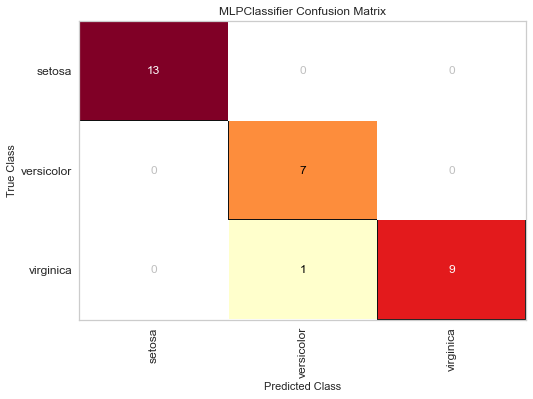

<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix = ConfusionMatrix(network, classes=iris.target_names)
confusion_matrix.fit(x_train, y_train)
confusion_matrix.score(x_test, y_test)
confusion_matrix.show()

#### 1.5 Network classification

In [48]:
x_test[0], y_test[0]

(array([6.1, 2.9, 4.7, 1.4]), 1)

In [49]:
x_test[0].shape

(4,)

In [50]:
nx = x_test[0].reshape(1, -1)
nx.shape

(1, 4)

In [51]:
network.predict(nx)

array([1])

# Using sklearn for regression

In [83]:
# utility functions
def show_datasplit(x_train, x_test, y_train, y_test):
    print(f"{'x_train':>21}{'x_test':>15}{'y_train':>15}{'x_test':>15}")
    print("-" * 80)
    print(f"Shape:{str(x_train.shape):>15}{str(x_test.shape):>15}{str(y_train.shape):>15}{str(x_test.shape):>15}")

In [99]:
from sklearn.neural_network import MLPRegressor
from sklearn import datasets

In [100]:
boston = datasets.load_boston()

In [101]:
inputs = boston.data

In [102]:
outputs = boston.target

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2)

In [104]:
show_datasplit(x_train, x_test, y_train, y_test)

              x_train         x_test        y_train         x_test
--------------------------------------------------------------------------------
Shape:      (404, 13)      (102, 13)         (404,)      (102, 13)


Neural nets perform a huge volume of calculations and matrix multiplication exercises so on large numbers that becomes time and memory inefficient. This is why we use the technique of converting to values between zero and one because that allows for a faster and more efficient way of performing the necessary calculations and matrix multiplications.

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
x_train = scaler1.fit_transform(x_train)
x_test = scaler1.fit_transform(x_test)

In [106]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

scaler2 = MinMaxScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.fit_transform(y_test)

In [107]:
show_datasplit(x_train, x_test, y_train, y_test)

              x_train         x_test        y_train         x_test
--------------------------------------------------------------------------------
Shape:      (404, 13)      (102, 13)       (404, 1)      (102, 13)


In [108]:
network = MLPRegressor(max_iter=2000, verbose=True, hidden_layer_sizes=(7))
network.fit(x_train, y_train)

Iteration 1, loss = 0.09192955
Iteration 2, loss = 0.08700165
Iteration 3, loss = 0.08244789
Iteration 4, loss = 0.07822999
Iteration 5, loss = 0.07419428
Iteration 6, loss = 0.07039278
Iteration 7, loss = 0.06660110
Iteration 8, loss = 0.06292670
Iteration 9, loss = 0.05941664
Iteration 10, loss = 0.05590630
Iteration 11, loss = 0.05246159
Iteration 12, loss = 0.04898194
Iteration 13, loss = 0.04556624
Iteration 14, loss = 0.04245919
Iteration 15, loss = 0.03974521
Iteration 16, loss = 0.03746315
Iteration 17, loss = 0.03544355
Iteration 18, loss = 0.03373550
Iteration 19, loss = 0.03213836
Iteration 20, loss = 0.03081891
Iteration 21, loss = 0.02959085
Iteration 22, loss = 0.02857582
Iteration 23, loss = 0.02765176
Iteration 24, loss = 0.02680831
Iteration 25, loss = 0.02610251
Iteration 26, loss = 0.02551610
Iteration 27, loss = 0.02492291
Iteration 28, loss = 0.02437932
Iteration 29, loss = 0.02390053
Iteration 30, loss = 0.02349451
Iteration 31, loss = 0.02312508
Iteration 32, los

/usr/local/Caskroom/miniconda/base/envs/pykit/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(hidden_layer_sizes=7, max_iter=2000, verbose=True)

In [109]:
predictions = network.predict(x_test)
predictions

array([ 0.28684902,  0.32470412,  0.38470039,  0.42157021,  0.25821679,
        0.25336635,  0.36407432,  0.63250113,  0.54668223,  0.58416923,
        0.41654707,  0.36163937,  0.60305846,  0.47358847,  0.51902446,
        0.47217376,  0.07056741,  0.50224688,  0.19912201,  0.47032422,
        0.56096347,  0.46736462,  0.30269859,  0.5733417 ,  0.40732821,
        0.29128029,  0.5138013 ,  0.59660579,  0.56959245,  0.15053837,
        0.11742744,  0.48172414,  0.43432799,  0.49396761,  0.453297  ,
        0.01444656,  0.38039585,  0.45310294,  0.36141838,  0.39624899,
        0.4820202 ,  0.33372771,  0.63190132,  0.35354956,  0.34982157,
        0.32258132,  0.65320611,  0.40224057,  0.43548471,  0.3303906 ,
        0.48421106,  0.46432581,  0.34775849,  0.36854249,  0.56749191,
        0.12124766,  0.0188742 ,  0.28235569,  0.57332169,  0.29316955,
        0.34534949,  0.269223  , -0.06547961,  0.11294081,  0.67645448,
        0.38807491,  0.29149284,  0.56904024,  0.5958184 ,  0.26

In [110]:
y_test

array([[0.22666667],
       [0.35555556],
       [0.31111111],
       [0.29333333],
       [0.20444444],
       [0.40222222],
       [0.40222222],
       [0.37555556],
       [0.77333333],
       [0.66444444],
       [0.34222222],
       [0.50888889],
       [0.84      ],
       [0.32888889],
       [0.69111111],
       [0.55333333],
       [0.18666667],
       [0.61111111],
       [0.07777778],
       [0.43111111],
       [0.63111111],
       [0.32      ],
       [0.34666667],
       [0.38888889],
       [0.36444444],
       [0.29777778],
       [1.        ],
       [0.72444444],
       [0.56666667],
       [0.27111111],
       [0.41555556],
       [0.37777778],
       [0.41333333],
       [0.85555556],
       [0.66888889],
       [0.19555556],
       [0.45111111],
       [0.55777778],
       [0.19111111],
       [0.34222222],
       [0.84666667],
       [0.31777778],
       [0.60444444],
       [0.30444444],
       [0.35777778],
       [0.34666667],
       [0.96666667],
       [0.357

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [112]:
mean_absolute_error(y_test, predictions)

0.11167915051085124

In [113]:
mean_squared_error(y_test, predictions)

0.02205920272071322

In [114]:
x_test[0], y_test[0]

(array([0.07998735, 0.        , 0.63234172, 0.        , 0.66454352,
        0.51835902, 0.98072805, 0.14039231, 1.        , 0.91312741,
        0.88372093, 0.89264152, 0.47836991]),
 array([0.22666667]))

In [116]:
nx = x_test[0].reshape(1, -1)
nx.shape

(1, 13)

In [117]:
network.predict(nx)

array([0.28684902])

In [121]:
scaler2.inverse_transform(network.predict(nx).reshape(-1,1))

array([[17.90820571]])

In [122]:
scaler2.inverse_transform(y_test[0].reshape(-1, 1))

array([[15.2]])